<a href="https://colab.research.google.com/github/MeenakshiMony/E_Commerce_Customer_Churn_Analysis_Prediction/blob/main/E_Commerce_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Business Understanding
**1. Project Objective**

* **Definition:** Customer churn (when customers stop doing business with a company) is a critical metric for e-commerce businesses. By predicting which customers are likely to churn, businesses can:
  * Implement targeted retention strategies
  * Reduce customer acquisition costs
  * Improve customer lifetime value
  * Allocate marketing resources more effectively


 *  **Goal**: Predict customer churn for an e-commerce platform to enable targeted retention strategies and reduce revenue loss.

 *  **Key Questions:**

  * Which customers are most likely to stop purchasing?
  * What behavioral or demographic factors drive churn?
  * How can we intervene proactively to retain high-risk customers?

**2. Expected Deliverables**
  * **Churn Risk Scores:** Probability of churn per customer.
  * **Segmentation:** High/Medium/Low risk tiers.
  * **Actionable Insights:** Find out actions to reduce churn.

## Step 2: Data Understanding
* **Goal:** Explore data quality, distributions, and initial patterns to inform preprocessing and modeling.
* This notebook explores and models customer churn behavior using a dataset from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).
*  Each row in the dataset represents a customer with 20 features such as:
   * Demographic - Gender, maritalStatus, CityTier
   * Service Usage & Engagement - Tenure, PreferredLoginDevice, HourSpendOnApp, etc
   * Purchase Behaviour & Financial - PreferredPaymentMode, OrderAmountHikeFromlastYear, OrderCount, etc
   * Customer Satisfaction & Support - SatisfactionScore, Complain
   * Churn Indicator (target variable)

In [127]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# Load the dataset
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')

In [129]:
# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst 3 rows:")
display(df.head(3))

Dataset shape: (5630, 20)

First 3 rows:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


In [130]:
# Check data types
print("🔍 Data Types:")
print(df.dtypes)

🔍 Data Types:
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


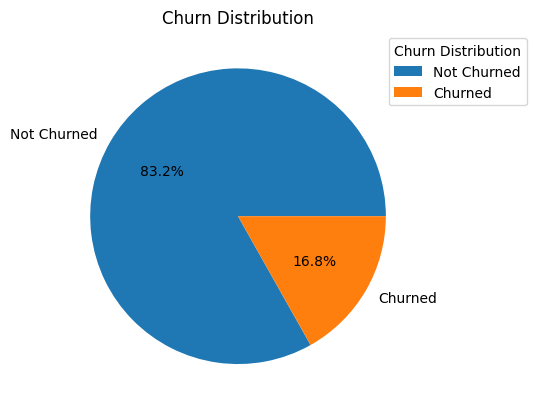

In [131]:
df['Churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', labels=['Not Churned', 'Churned'],)
plt.title('Churn Distribution')
plt.ylabel('');
plt.legend(title='Churn Distribution', labels=['Not Churned', 'Churned'], loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

**Key Observations:**

 * Dataset contains 5,630 customers with 20 features
 * Target variable: Churn (binary: 1 = churned, 0 = retained)
 * Initial churn rate: 16.9% (imbalanced dataset)
 * Features include:
   * Demographic info (Tenure, CityTier)
   * Behavioral data (OrderCount, CashbackAmount)
   * Service metrics (Complain, DaySinceLastOrder)

## Step 3: Data Preparation
* Data preparation cleanses and transforms raw data by handling missing values, encoding features, and scaling for model readiness.

**1. Missing Value Handling:** Missing value imputation enables accurate model processing and preserves key information for reliable predictions.

In [132]:
# Missing value analysis
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print("Missing values:\n", pd.DataFrame({'count': missing_values, 'percent': missing_percent}).sort_values(by='count', ascending=False))

Missing values:
                              count   percent
DaySinceLastOrder              307  5.452931
OrderAmountHikeFromlastYear    265  4.706927
Tenure                         264  4.689165
OrderCount                     258  4.582593
CouponUsed                     256  4.547069
HourSpendOnApp                 255  4.529307
WarehouseToHome                251  4.458259
CustomerID                       0  0.000000
PreferredLoginDevice             0  0.000000
Churn                            0  0.000000
PreferredPaymentMode             0  0.000000
CityTier                         0  0.000000
SatisfactionScore                0  0.000000
PreferedOrderCat                 0  0.000000
NumberOfDeviceRegistered         0  0.000000
Gender                           0  0.000000
Complain                         0  0.000000
NumberOfAddress                  0  0.000000
MaritalStatus                    0  0.000000
CashbackAmount                   0  0.000000


In [133]:
# Split features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Impute missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Verify no missing values left
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


**2. Feature Analysis & Engineering:** It enhance model performance by selecting and transforming variables to better capture underlying patterns in the data.

Target Variable Extraction:

In [134]:
# Extract Churn (target variable) from numerical features
num_cols = num_cols.drop('Churn')

# Current Numerical and categorical features
print("Numerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)

Numerical Columns: Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Categorical Columns: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


Categorical Features:

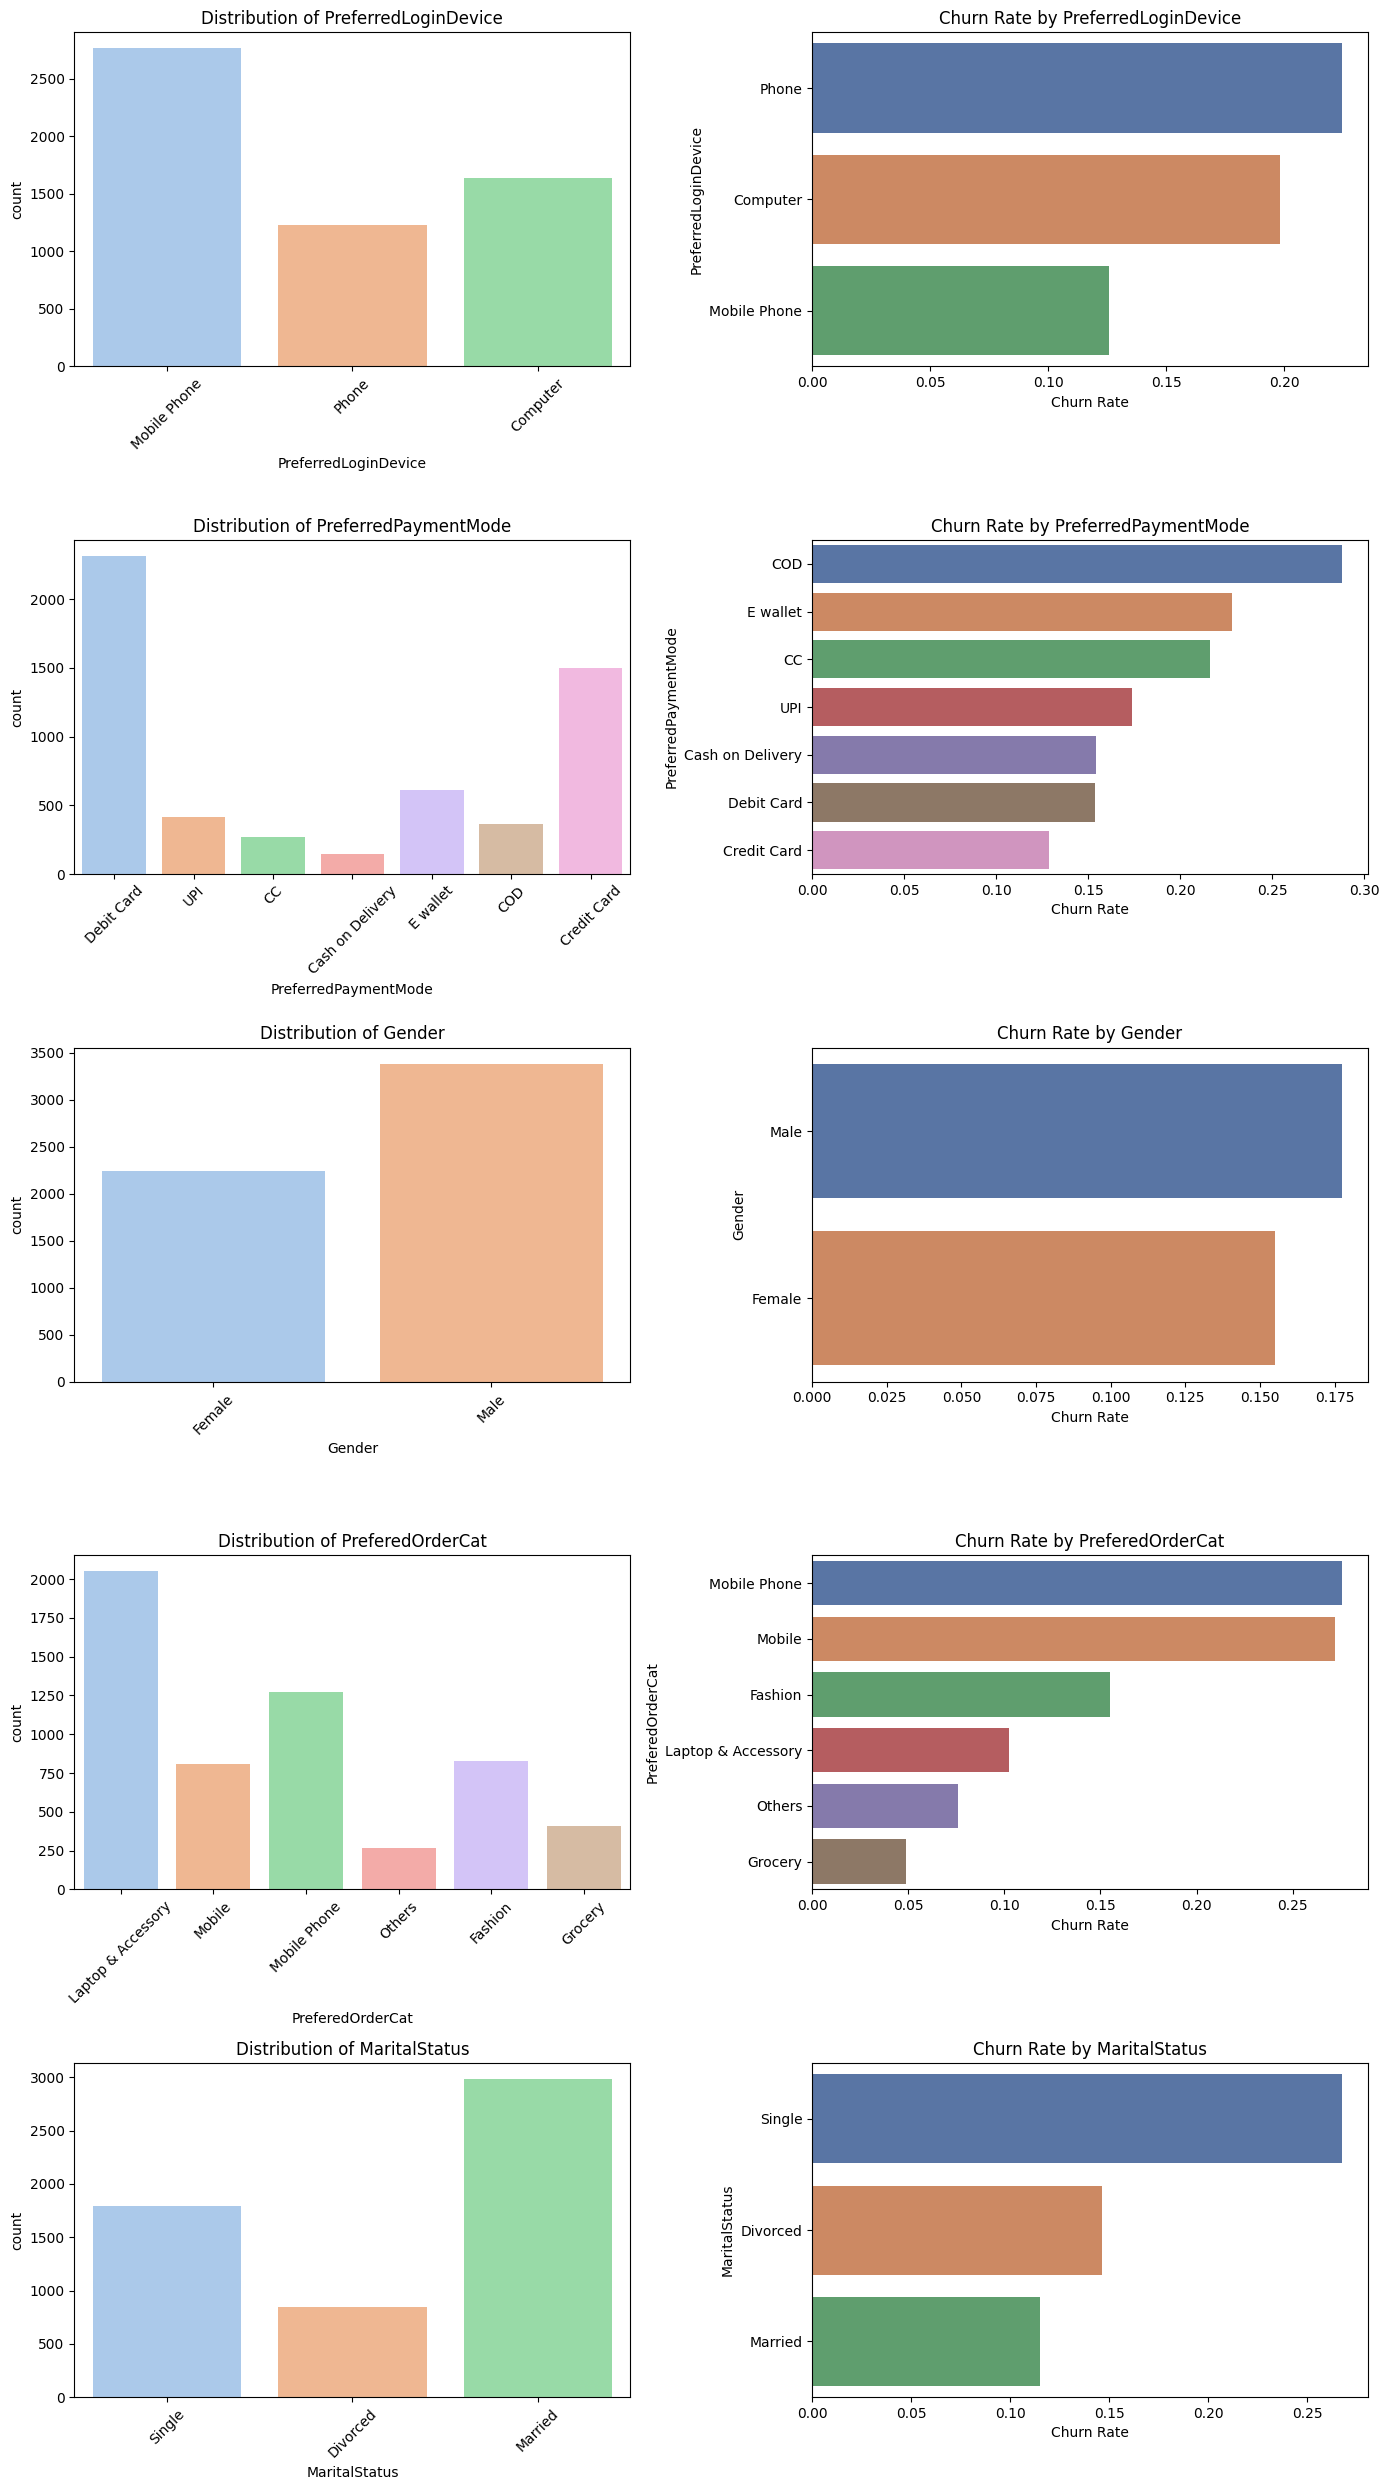

In [135]:
# Set color palettes (match number of unique values per column)
from matplotlib.cm import get_cmap

# Create subplots: one row per feature, 2 columns
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=2, figsize=(14, 5 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    # Get number of unique values in the category
    num_classes = df[col].nunique()

    # Dynamically adjust palette size
    dist_colors = sns.color_palette("pastel", n_colors=num_classes)
    churn_colors = sns.color_palette("deep", n_colors=num_classes)

    # Distribution plot
    sns.countplot(data=df, x=col, ax=axes[i, 0], hue=col, palette=dist_colors, legend=False)
    axes[i, 0].set_title(f"Distribution of {col}")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Churn rate plot
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False).reset_index()
    sns.barplot(data=churn_rate, x='Churn', y=col, ax=axes[i, 1], hue=col, palette=churn_colors, legend=False)
    axes[i, 1].set_title(f"Churn Rate by {col}")
    axes[i, 1].set_xlabel("Churn Rate")
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

Key Takeaways:
* Login Device: Computer users have higher churn due to less engaging experience. Improving desktop UI/UX and offering discounts can help.
* Payment Mode: COD users churn more due to lower commitment. Offering cashback or discounts on digital payments can reduce churn.
* Gender: No significant gender difference in churn.
* Order Category: Mobile buyers churn more. Loyalty programs, extended warranties, or bundles could boost retention.
* Marital Status: Singles have higher churn, possibly due to price sensitivity. Personalized campaigns with lifestyle recommendations could retain them.

Numerical Features:

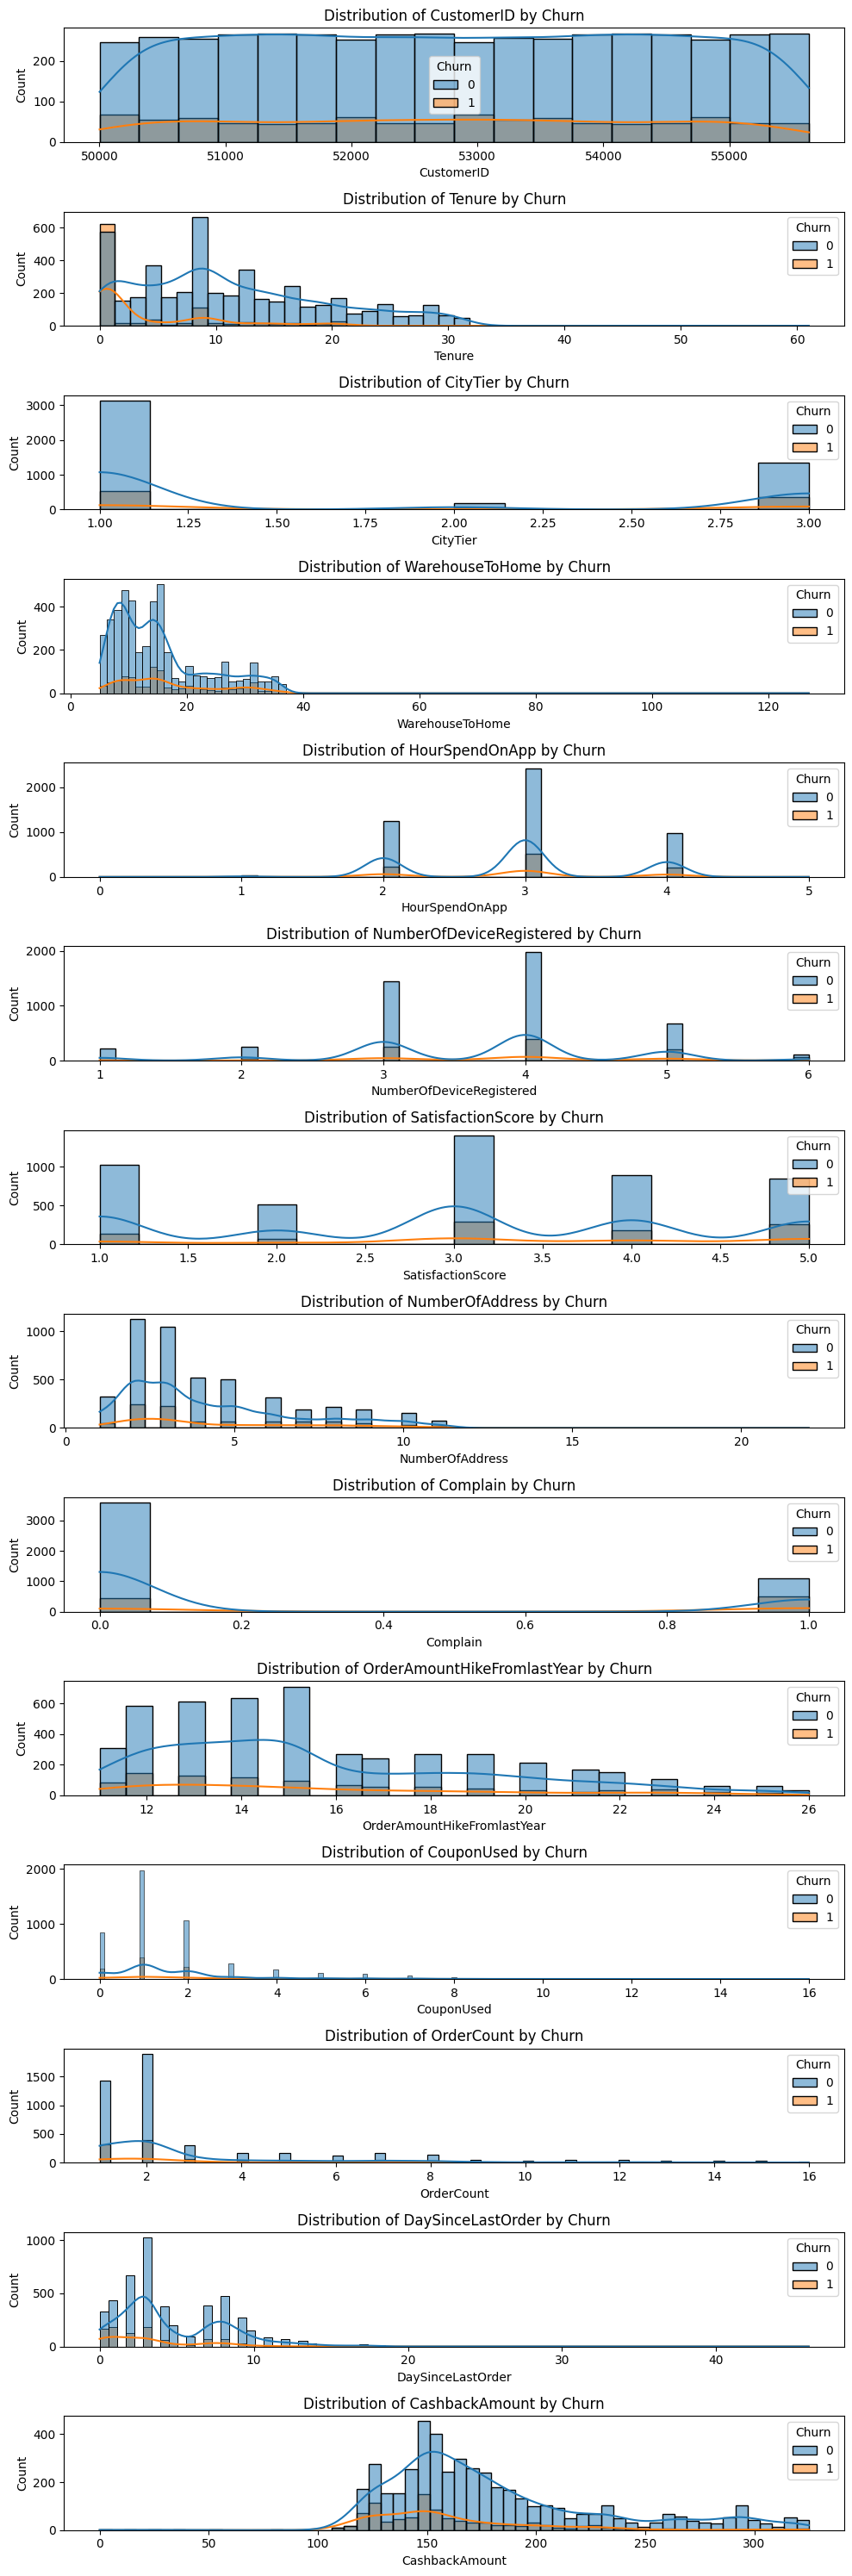

Correlation with Churn:
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
HourSpendOnApp                 0.018816
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
CustomerID                    -0.019083
OrderCount                    -0.024038
CashbackAmount                -0.154118
DaySinceLastOrder             -0.155871
Tenure                        -0.337831
dtype: float64


In [136]:
# Plot numerical distributions
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 30))

for i, col in enumerate(num_cols):
    # Distribution plot
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Churn")
    plt.tight_layout()

plt.show()

# Correlation with churn
print("Correlation with Churn:")
print(df[num_cols].corrwith(df['Churn']).sort_values(ascending=False))

Insights about each feature:
* Tenure (-0.34): New customers churn more. Onboarding programs and early loyalty incentives can improve retention.
* DaySinceLastOrder (-0.16): Recent orders reduce churn risk. Implement re-engagement campaigns for inactive customers.
* CashbackAmount (-0.15): Higher cashback correlates with lower churn. Increase cashback incentives for at-risk customers.
* Complain (0.25): Filing complaints increases churn risk. Improve complaint resolution and follow-up satisfaction.
* NumberOfDeviceRegistered (0.11): Users with more devices show higher churn. Investigate device sharing or security concerns.
* SatisfactionScore (0.11): Mid-range satisfaction scores correlate with churn. Address neutral satisfaction customers proactively.
* CityTier (0.08): Tier 1 cities show higher churn. Address competition in metropolitan areas.
* WarehouseToHome (0.07): Longer delivery distances slightly increase churn. Optimize logistics for faster deliveries.
* HourSpendOnApp (0.02): Users spending less than 1 hour on the app churn more. Increase engagement with personalized notifications.
* CouponUsed (-0.001): Minimal impact on churn. Focus on holistic retention strategies rather than just discounts.
* OrderCount (-0.02): Frequent buyers show better retention. Reward high-frequency shoppers with tiered benefits.
* OrderAmountHikeFromlastYear (-0.01): Price sensitivity does not significantly impact churn. Monitor price hikes but don’t rely solely on this metric.


Features Key Improvements to be made:
* Shorter Tenure: New customers churn more. Onboarding programs and early loyalty incentives can improve retention.
* Number of Devices: Fewer devices correlate with higher churn. Encourage multi-device usage and offer exclusive benefits.
* Satisfaction Scores: Low satisfaction increases churn. Focus on customer support and proactive problem resolution.
* Complaints: Frequent complaints are linked to higher churn. Address issues quickly and improve service reliability.
* Order Frequency: Infrequent buyers churn more. Use personalized promotions or subscription models to encourage repeat purchases.
* Low Cashback: Lower cashback correlates with higher churn. Increase cashback rewards or offer discounts to retain customers.

Feature Transformations:

In [137]:
df_original = df.copy()  # Save the original dataset before transforming

In [138]:
# Merge similar categories
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery'
})

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile Phone': 'Mobile'
})

# Drop Gender
df = df.drop('Gender', axis=1)

In [139]:
# Binning Tenure
df['Tenure_Group'] = pd.cut(df['Tenure'],
                            bins=[0, 6, 12, 60],
                            labels=['<6mo', '6-12mo', '>1yr'])

# Create new Feature - Inactive User Flag
df['Is_Inactive'] = (df['DaySinceLastOrder'] > 30).astype(int)

# Drop weak features
df = df.drop(['CustomerID', 'CouponUsed', 'OrderAmountHikeFromlastYear'], axis=1)

In [140]:
# Separate final features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Churn' from numerical columns (it's our target variable)
num_features.remove('Churn')

print("Numerical Columns:", num_features)
print("\nCategorical Columns:", cat_features)

Numerical Columns: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Is_Inactive']

Categorical Columns: ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']


**3. Standard Scaling:** Ensures features with larger scales (like CashbackAmount) don't dominate those with smaller scales (like Tenure) using z-score normalization by standardizing to mean = 0 and std = 1.

In [141]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler and transform data to have mean = 0 and standard deviatin = 1
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Verify
print(df[num_features].describe().round(2))

        Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
count  5630.00   5630.00          5630.00         5630.00   
mean      0.00      0.00             0.00            0.00   
std       1.00      1.00             1.00            1.00   
min      -1.21     -0.72            -1.27           -4.16   
25%      -0.85     -0.72            -0.79           -1.32   
50%      -0.14     -0.72            -0.19            0.09   
75%       0.58      1.47             0.53            0.09   
max       6.09      1.47            13.35            2.93   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
count                   5630.00            5630.00          5630.00   5630.00   
mean                      -0.00              -0.00             0.00     -0.00   
std                        1.00               1.00             1.00      1.00   
min                       -2.63              -1.50            -1.24     -0.63   
25%                       -0.67              

**4. One-Hot Encoding:** Allows algorithms to properly interpret categorical data without assuming ordinal relationships

In [142]:
# One-Hot Encoding for low-cardinality categoricals
cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode',
                'PreferedOrderCat', 'MaritalStatus', 'Tenure_Group']

df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Verify
print(df.filter(like='_').columns)

Index(['Is_Inactive', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Tenure_Group_6-12mo', 'Tenure_Group_>1yr'],
      dtype='object')


**5. Train-Test Split:** Dataset is divided into training and testing sets to assess model's generalization ability.

In [143]:
X = df.drop('Churn', axis=1)  # All columns except Churn
y = df['Churn']  # Only the Churn column

In [144]:
from sklearn.model_selection import train_test_split

# Use stratify=y to maintain the same class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% of test data (80% training)
    random_state=42,
    stratify=y
)

In [145]:
# 4. Verify distributions
print("\nOriginal Churn Rate:", y.mean().round(3))
print("Train Churn Rate:", y_train.mean().round(3))
print("Test Churn Rate:", y_test.mean().round(3))

# 5. Check feature preservation
print("\nTrain Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)


Original Churn Rate: 0.168
Train Churn Rate: 0.168
Test Churn Rate: 0.169

Train Features Shape: (4504, 26)
Test Features Shape: (1126, 26)


## Step 3: Modelling
* This step involves training machine learning algorithms on prepared data to learn patterns and make accurate predictions.

**XGBoost Classifier:**
* XGBClassifier is a powerful gradient boosting algorithm optimized for performance and scalability.
* Its used for binary classification, perfect for predicting churn (1) vs no churn (0).
* It builds an ensemble of decision trees iteratively to minimize prediction error.

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       936
           1       0.62      0.89      0.73       190

    accuracy                           0.89      1126
   macro avg       0.80      0.89      0.83      1126
weighted avg       0.91      0.89      0.90      1126

AUC-PR: 0.817


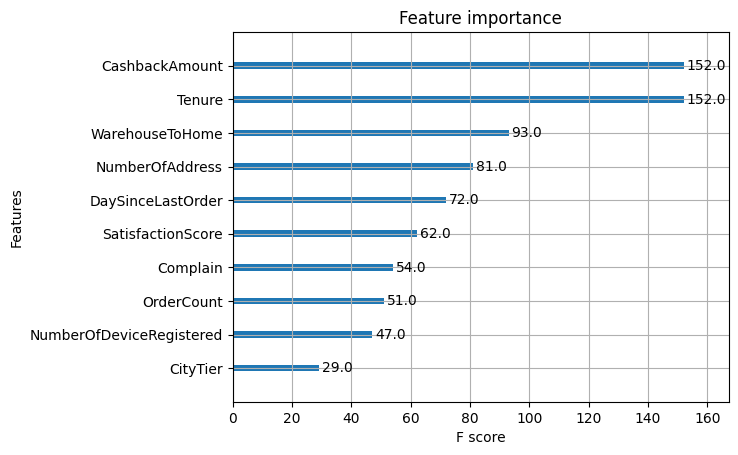

In [146]:
import xgboost as xgb
from sklearn.metrics import classification_report, average_precision_score

# Auto-calculate class weight
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # ≈5:1 ratio

# parameters
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    n_estimators=150,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='aucpr',  # Optimizes for imbalanced data
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"AUC-PR: {average_precision_score(y_test, y_proba):.3f}")

# Plot Feature importance
ax = xgb.plot_importance(model, max_num_features=10)

plt.show()

After Optimization:

In [147]:
from sklearn.metrics import precision_recall_curve

# Find optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
optimal_idx = (precisions * recalls).argmax()  # F1-maximizing threshold
optimal_threshold = thresholds[optimal_idx]

# Re-predict with new threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       936
           1       0.75      0.82      0.79       190

    accuracy                           0.92      1126
   macro avg       0.86      0.88      0.87      1126
weighted avg       0.93      0.92      0.93      1126



Changes After Optimization (class 1 = Churners, 0=retained):

| **Metric**            | **Before Optimization** | **After Optimization** | **Improvement**                         |
|-----------------------|-------------------------|-------------------------|------------------------------------------|
| Precision  | 0.62                    | 0.75                    |  ↑ Better quality predictions            |
| Recall     | 0.89                    | 0.82                    |  ↓ Slightly lower, but still good        |
| F1-score    | 0.73                    | 0.79                    |  ↑ Better balance of precision & recall  |
| Accuracy              | 0.89                    | 0.92                    |  ↑ Overall improvement                   |

What this means:
* Optimization using a custom threshold helped improve the **precision and F1-score for churn prediction**, making the model more reliable for identifying churners without too many false alarms.
* Before: The model caught most churners (high recall) but misclassified many non-churners as churners (low precision).

* After: The model is more confident and accurate in identifying actual churners (higher precision and F1).

* This trade-off leads to a more reliable model, especially important in business use-cases like churn where wrong alerts can be costly.



## Step 4: Deployment & Actionable Insights

In [148]:
# Ensure we only use features the model was trained on
features_for_prediction = X_train.columns.tolist()  # Get original feature names

# Generate predictions (WITHOUT adding new columns first)
churn_probs = model.predict_proba(df[features_for_prediction])[:, 1]

# Now safely add to DataFrame
df['ChurnRisk'] = churn_probs

**1. Visualizing Churn Insights:**
- Plot 1: Churn Risk Distribution (Histogram):
  * shows distribution of predicted churn probabilities across customers
  * X-axis: Churn probability (0 = safe, 1 = high risk)
  * Y-axis: Number of customers in each risk bucket

- Plot 2: Top Churn Drivers (Bar Chart):
  * Highlighting the top features contributing to customer churn detected from prediction model
  * Taller bars = stronger impact on churn

- Plot 3: Customer Segmentation Matrix (Bubble Chart) & Risk Tier Statistics (Gradient Bar)
  * Bubble Chart:
    * This scatter visualizes customer risk segmentation based on Tenure, CashbackAmount, and other customer behaviors
    * X-axis: Tenure (Left = New customers, Right = Loyal customers)
    * Y-axis: CashbackAmount (Bottom = Low cashback, Top = High cashback)
    * Bubble size: Order frequency (Larger = Frequent buyers, Smaller =
  Occasional buyers)
   
 * Risk Tier Statistics:
   * A vertical gradient bar with numerical label ranges from 0.1 to 0.9
   * Numerical value represents churn risk probability (0.1 - low risk, 0.5 -medium risk, 0.9 - high risk)
   * color: visually indicate the severity of churn risk (blue - low risk, violet- moderate risk, red - high risk, orange - very high risk, yellow - critical risk)

In [154]:
df_original['ChurnRisk'] = churn_probs

In [156]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Churn Risk Distribution
fig1 = px.histogram(df, x='ChurnRisk', nbins=20,
                   title='Fig 1: Customer Churn Risk Distribution',
                   labels={'ChurnRisk': 'Predicted Churn Probability'},
                   color_discrete_sequence=['#FF6B6B'])

# 2. Top Churn Drivers
top_features = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder']
importance_scores = [152, 152, 93, 81, 72]
bar_colors = ['#355070', '#6D597A', '#B56576', '#E56B6F' , '#EAAC8B']

fig2 = go.Figure()
for i in range(len(top_features)):
    fig2.add_trace(go.Bar(
        x=[top_features[i]],
        y=[importance_scores[i]],
        marker_color=bar_colors[i],
        name=top_features[i]
    ))

fig2.update_layout(
    title='Fig 2: Top 5 Churn Drivers',
    xaxis_title='Features',
    yaxis_title='Importance Score',
    showlegend=False
)

# 3. Customer Segmentation Matrix
df_original['OrderCount_Visual'] = df_original['OrderCount'].clip(lower=0) + 1
fig3 = px.scatter(df_original, x='Tenure', y='CashbackAmount',
                 color='ChurnRisk', size='OrderCount_Visual',
                 hover_data=['CityTier', 'PreferredPaymentMode'],
                 title="Fig 3: Customer Risk Segmentation",
                 color_continuous_scale='RdYlGn_r')

# Create dashboard
dashboard = make_subplots(rows=2, cols=2, subplot_titles=(
    "Fig 1: Customer Churn Risk Distribution",
    "Fig 2: Top 5 Churn Drivers",
    "Fig 3: Customer Risk Segmentation",
    ""
),vertical_spacing=0.2)

dashboard.add_trace(fig1.data[0], row=1, col=1)
for trace in fig2.data:
    dashboard.add_trace(trace, row=1, col=2)
for trace in fig3.data:
    dashboard.add_trace(trace, row=2, col=1)

# Axis labels
dashboard.update_xaxes(title_text="Churn Probability", row=1, col=1)
dashboard.update_yaxes(title_text="Customer Count", row=1, col=1)

dashboard.update_xaxes(title_text="Features", row=1, col=2)
dashboard.update_yaxes(title_text="Importance Score", row=1, col=2)

dashboard.update_xaxes(title_text="Tenure (Months)", row=2, col=1)
dashboard.update_yaxes(title_text="Cashback Amount", row=2, col=1)

# Layout
dashboard.update_layout(
    height=900,
    showlegend=False,
    title_text="<b>Customer Churn Analysis Dashboard</b>",
    title_x=0.5,
    margin=dict(t=80, b=40)
)
dashboard.show()


Key Takeaways:
- Plot 1:
  * Most customers cluster in low-risk (left side) groups
* Plot 2:
 * CashbackAmount and Tenure are top drivers
→ Low cashback + short tenure customers are most vulnerable
 * Complain is a smaller but actionable driver
→ Service recovery matters
- Plot 3:
  * customers with lower tenure and cashback amounts are at higher risk of churn, while long-tenure customers with higher cashback benefits tend to be more stable
  * This highlight the need for targeted retention strategies for high-risk segments.

**2. Key Metrics for Business Insight:**

Here are some key metrics that provide an overview of churn and customer retention


In [157]:
metrics = {
    "Total Customers": len(df),
    "Current Churn Rate": f"{df['Churn'].mean()*100:.1f}%",
    "At-Risk Customers": f"{len(df[df['ChurnRisk'] > 0.7])} ({len(df[df['ChurnRisk'] > 0.7])/len(df)*100:.1f}%)",
}

print(pd.DataFrame.from_dict(metrics, orient='index', columns=['Value']))

                          Value
Total Customers            5630
Current Churn Rate        16.8%
At-Risk Customers   952 (16.9%)


**3. Retention Strategy: Segmentation and Targeting:**

We segment customers into different tiers for targeted retention actions like email campaigns

In [158]:
# Segment customers for email campaigns
def assign_retention_tier(row):
    if row['ChurnRisk'] > 0.7:
        return 'HighRisk: 15% discount + free shipping'
    elif row['ChurnRisk'] > 0.5:
        return 'MediumRisk: 10% discount'
    else:
        return 'LowRisk: Newsletter only'

df['RetentionAction'] = df.apply(assign_retention_tier, axis=1)

**4. Potential Revenue Saved by Retention Strategies:**

By calculating the potential savings for each retention action, we can prioritize our retention efforts

In [159]:
# Calculate potential revenue saved
avg_order_value = 100  # Your actual AOV
df['PotentialSavings'] = df['ChurnRisk'] * avg_order_value
print(f"Total preventable loss: ${df['PotentialSavings'].sum():.2f}")


Total preventable loss: $161016.41


**5. Retention Strategy Impact Analysis:**

A dual-axis chart to analyze the impact of each retention action on preventable revenue loss and churn probability

In [160]:
# Calculate average potential savings per action
action_impact = df.groupby('RetentionAction', as_index=False).agg({
    'PotentialSavings':'mean',
    'ChurnRisk':'mean'
}).sort_values('PotentialSavings', ascending=False)

# Create dual-axis chart
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=action_impact['RetentionAction'],
        y=action_impact['PotentialSavings'],
        name='Avg Savings',
        marker_color='#636EFA'
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=action_impact['RetentionAction'],
        y=action_impact['ChurnRisk'],
        name='Churn Risk',
        mode='lines+markers',
        line=dict(color='#EF553B', width=2)
    ),
    secondary_y=True
)

fig.update_layout(
    title_text="Retention Strategy Impact Analysis",
    xaxis_title="Retention Action",
    yaxis_title="Preventable Revenue Loss ($)",
    yaxis2_title="Churn Probability"
)
fig.show()

### Summary of Actionable Insights
* High-risk customers: These customers should receive strong retention offers like a 15% discount and free shipping to prevent churn.

* Medium-risk customers: A 10% discount should be used to retain this segment.

* Low-risk customers: A simple newsletter may be sufficient for this segment.

* Revenue Loss Impact: The retention actions, especially those targeted at high-risk customers, could save significant revenue. Prioritizing these actions will lead to a more cost-effective retention strategy.
